<a href="https://colab.research.google.com/github/Volodimirich/MadeFinalProject/blob/main/Papers_dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Учебный проект 

##Команда 17:

1.   Шапошников Владимир 
2.   Рамазанов Куат 
3.   Шадрин Сергей  
4.   Обарская Татьяна  
5.   Косарева Екатерина 
6.   Коваленко Михаил 
7.   Мелех Даниил 


**Тьютор** - Николай Марнаутов


# Загрузка данных

Для проекта был выбран датасет https://originalstatic.aminer.cn/misc/dblp.v13.7z, описание датасета можно найти по ссылке https://www.aminer.cn/citation

В связи с большим объемом датасета (17 Гб), для удобства анализа он был предворительно обработан и разбит на более мелкие файлы. Доступ к файлам:

1) Полный датасет в формате JSONL 
https://drive.google.com/file/d/1-Go0pdM_rXjwi2OaIj7tJ7ZjifjLSF43/view?usp=sharing

2) Папка с файлами https://drive.google.com/drive/folders/11pA1QTj0rsyaurpmGaQdGJfaG2cZnmNo?usp=sharing


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

data = pd.read_json('/content/gdrive/MyDrive/dblpv13.zip', lines = True, chunksize= 200_000)
for d in data:
  break
d.head()

,_id,title,venue,year,keywords,n_citation,lang,authors,fos,page_start,page_end,volume,issue,issn,isbn,doi,pdf,url,abstract,references
0,53e99784b7602d9701f3e3f5,3GIO.,{'type': 0},2011.0,[],0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53e99784b7602d9701f3e151,A solution to the problem of touching and brok...,"{'_id': '53a72a4920f7420be8bfa51b', 'name_d': ...",1993.0,"[handwriting recognition, prototypes, image se...",17.0,en,"[{'_id': '53f46797dabfaeb22f542630', 'name': '...","[Intelligent character recognition, Pattern re...",602,605,,,,,10.1109/ICDAR.1993.395663,None,[http://dx.doi.org/10.1109/ICDAR.1993.395663],,"[53e99cf5b7602d97025ace63, 557e8a7a6fee0fe990c..."
2,53e99784b7602d9701f3e133,The relationship between canopy parameters and...,"{'_id': '53a7297d20f7420be8bd4ae7', 'name_d': ...",2011.0,"[canopy parameters, canopy spectrum, different...",0.0,en,"[{'_id': '53f45728dabfaec09f209538', 'name': '...","[Agronomy, Moisture, Hydrology, Environmental ...",1930,1933,null,null,,,10.1109/IGARSS.2011.6049503,None,[http://dx.doi.org/10.1109/IGARSS.2011.6049503],Drought is the first place in all the natural ...,NaN
3,53e99784b7602d9701f3e161,360°,"{'_id': '5390a74a20f70186a0e8b40b', 'raw': 'AC...",2009.0,"[global high technology, daily short-distance ...",NaN,en,"[{'_id': '53f46946dabfaec09f24b4ed', 'name': '...",NaN,39,39,,,,,10.1145/1665137.1665166,NaN,NaN,360° represents the concerns that are addresse...,NaN
4,53e99784b7602d9701f3e15d,Timing yield estimation using statistical stat...,"{'_id': '53a72e2020f7420be8c80142', 'name_d': ...",2005.0,"[sequential circuits, statistical distribution...",28.0,en,"[{'_id': '53f43b03dabfaedce555bf2a', 'name': '...","[Delay calculation, Timing failure, Monte Carl...",2461,2464Vol.3,,,,0-7803-8834-8,10.1109/ISCAS.2005.1465124,//static.aminer.org/pdf/PDF/000/423/329/timing...,"[http://dx.doi.org/10.1109/ISCAS.2005.1465124,...",As process variations become a significant pro...,"[53e9a8a9b7602d97031f6bb9, 599c7b6b601a182cd27..."


#Схема данных

Основные поля датасета представлены в таблице

In [ ]:
data_schema = pd.read_csv('/content/gdrive/MyDrive/MADE/data/data schema.csv', header = 0, index_col = 0)
data_schema

,Field Type,Description,Example­
Field Name,,,
id,string,paper ID,43e17f5b20f7dfbc07e8ac6e
title,string,paper title,Data mining: concepts and techniques
authors.name,string,author name,Jiawei Han
author.org,string,author affiliation,Department of Computer Science University of ...
author.id,string,author ID,53f42f36dabfaedce54dcd0c
Author.gid,string,affiliation_ID,5b869d7fe1cd8e14a3a2dc35
venue.type,int,paper type,10
venue.raw,string,paper venue name,Inteligencia Artificial Revista Iberoamerican...
venew.publisher,string,Publisher name,Elsevier


# Анализ дубликатов и пропущенных значений

Для обработки наших данных разбитых на более мелкие файлы воспользуемся библиотекой Dask

In [ ]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import io
import json
import dask
import dask.dataframe as dd
from dask.distributed import progress
from dask.diagnostics import ProgressBar

import matplotlib.pyplot as plt

## Анализ дубликатов

Загружаем все файлы, в которых мы сохранили данные со следующими полями  
*  _id	
*  title	
*  year	
*  authors	
*  doi

**doi** определяет уникальность статей, однако это поле присутствует не у всех записей, поэтому кроме **doi** мы будем анализировать уникальность статей по всем вышеперечисленным полям





In [ ]:
from pandas.io.parsers.readers import is_index_col
ddf = dd.read_csv("/content/gdrive/MyDrive/MADE/data/id_title_authors_id_*.csv", dtype={'Unnamed: 0': 'object', 'title': 'str', 'year': 'object', 'authors': 'object', 'doi': 'str'})
ddf.set_index('Unnamed: 0')

,_id,title,year,authors,doi
npartitions=51,,,,,
0,object,object,object,object,object
1087211,...,...,...,...,...
...,...,...,...,...,...
900836,...,...,...,...,...
m{hat L}} Features.,...,...,...,...,...


In [ ]:
ddf.head()

,Unnamed: 0,_id,title,year,authors,doi
0,0,53e99784b7602d9701f3e3f5,3GIO.,2011.0,NaN,NaN
1,1,53e99784b7602d9701f3e133,The relationship between canopy parameters and...,2011.0,"[{'_id': '53f45728dabfaec09f209538', 'name': '...",10.1109/IGARSS.2011.6049503
2,2,53e99784b7602d9701f3e151,A solution to the problem of touching and brok...,1993.0,"[{'_id': '53f46797dabfaeb22f542630', 'name': '...",10.1109/ICDAR.1993.395663
3,3,53e99784b7602d9701f3e15d,Timing yield estimation using statistical stat...,2005.0,"[{'_id': '53f43b03dabfaedce555bf2a', 'name': '...",10.1109/ISCAS.2005.1465124
4,4,53e99784b7602d9701f3e161,360°,2009.0,"[{'_id': '53f46946dabfaec09f24b4ed', 'name': '...",10.1145/1665137.1665166


Проанализируем количество отсутствующих элементов в каждом столбце таблицы

In [ ]:
ddf.notnull().sum().compute()

Unnamed: 0    5354329
_id           5354326
title         5353935
year          5349365
authors       5346143
doi           3994553
dtype: int64

Функция **size** считает число ячеек в таблице, зная количество столбцов, можем найти число строк

In [ ]:
with ProgressBar():
  row_count = ddf.size.compute()
print(row_count)

[########################################] | 100% Completed | 43.9s
32125974


In [ ]:
#Row number
print(int(row_count/6))


5354329


Находим дубликаты по полям 'title', 'authors' and 'year'. Найдено 1 177 дубликатов

In [ ]:
ddf_new = ddf.drop_duplicates(subset = ['title', 'year', 'authors'])
new_ids = ddf_new['_id']
with ProgressBar():
  new_size = new_ids.size.compute()

[########################################] | 100% Completed |  1min  8.5s


In [ ]:
print('New size',new_size)
print('Number of duplicates', int(row_count/6) - new_size)

New size 5353152
Number of duplicates 1177


Удаляем из таблицы строки с пустым значение в поле **doi**, чтобы найти дубликаты по **doi** и выводим количество строк новой таблицы

In [ ]:
clean_data = ddf_new.dropna(subset = ['doi'])
with ProgressBar():
  row_count_without_na = clean_data['_id'].size.compute()

print(row_count_without_na)



[########################################] | 100% Completed |  1min 10.0s
3993998


Удаляем дубликаты по признаку **doi** и выводим количество строк новой таблицы

In [ ]:
data_no_duplicates = clean_data.drop_duplicates(subset = ['doi'])
no_doi_duplicates = data_no_duplicates['_id']

with ProgressBar():
  row_count_no_duplicates = no_doi_duplicates.size.compute()

print("Number of rows without duplicates",row_count_no_duplicates)

[########################################] | 100% Completed |  1min 15.8s
Number of rows without duplicates 3941554


Теперь мы можем найти **id** всех дубликатов в нашем датасете: 


In [ ]:
duplicates_id = (set(ddf['_id']) - set(ddf_new['_id'])) | (set(clean_data['_id']) - set(no_doi_duplicates)) 

In [ ]:
print('Number of duplicates', len(duplicates_id))

Number of duplicates 53619


In [ ]:
pd.DataFrame(list(duplicates_id), columns = ['_id']).to_csv('/content/gdrive/MyDrive/MADE/data/duplicates_ids.csv')

## Анализ пропущенных значений 

In [ ]:
nans_dict = {}

for column in d.columns:
  nans_dict[f'{column}'] = 0

for d in data:
  for column in d.columns:
    nans_dict[f'{column}'] += d[f'{column}'].isna().sum()

# new_size = 5353152

nans_dict = {column: 100 * value / new_size for column, value in nans_dict.items()}
nans_dict = dict(sorted(nans_dict.items(), key=lambda item: item[1]))

nans_dict

{'_id': 0.0,
 'year': 0.00024284757839867054,
 'title': 0.007079940939468933,
 'venue': 0.11219558122018579,
 'authors': 0.21245426993292924,
 'page_start': 1.1566082935810529,
 'doi': 1.9592569013545664,
 'page_end': 2.2030385089009243,
 'url': 2.5928275528137443,
 'volume': 4.262834307712541,
 'issue': 5.752872326434968,
 'fos': 6.053218739165262,
 'n_citation': 10.78118088184307,
 'lang': 11.73039734347166,
 'abstract': 11.932353125784584,
 'issn': 13.161255275396627,
 'isbn': 17.64534240761331,
 'keywords': 21.884302930310966,
 'references': 23.96619785875686,
 'pdf': 79.4277838551941}

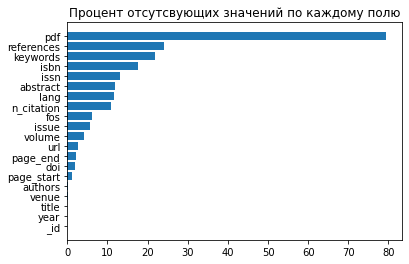

In [ ]:
plt.title('Процент отсутсвующих значений по каждому полю')
plt.barh(*zip(*nans_dict.items()))
plt.show()

# Статистика по числу цитирований (без дубликатов)

In [ ]:
import pandas as pd
df_citation = pd.read_csv('/content/gdrive/MyDrive/17TeamProject/id_citations.csv')

In [ ]:
df_citation.drop('Unnamed: 0', axis=1, inplace=True)
df_citation.rename(columns = {'_id':'id'}, inplace=True)

Посчитаем количество пропущенных значений в поле n_citation, а также узнаем, сколько статей ни разу не цитировались

In [ ]:
nans = round(df_citation['n_citation'].isna().sum()/df_citation.shape[0], 3) * 100
zeros = round(sum(df_citation['n_citation']==0)/df_citation.shape[0], 3) * 100
print(f'NaN values are {nans}% of dataset', f'. Zero values are {zeros}% of dataset')

NaN values are 10.9% of dataset . Zero values are 25.1% of dataset


In [ ]:
# Есть статьи с очень высоким индексом цитирования
df_citation[df_citation['n_citation']>10000].n_citation.min(), df_citation.n_citation.max()

(10047.0, 109033.0)

Из-за статей с очень высокими индексами цитирования (возможно, эти статьи являются основополагающими в своих областях), график числа цитирований будет иметь длинный хвост распределения. Поэтому будем считать статистику медианного числа цитирования среди статей вместо среднего. Получается, медианное значение числа цитирования среди всех статей равно 3

In [ ]:
df_citation.n_citation.median()

3.0

In [ ]:
df_citation['n_citation'].replace(np.nan, 0, inplace=True)

Посчитаем количество статей с конкретным числом цитирования (для статей с индексом цитирования > 0 и < 50 и построим график:

Text(0, 0.5, 'count of articles')

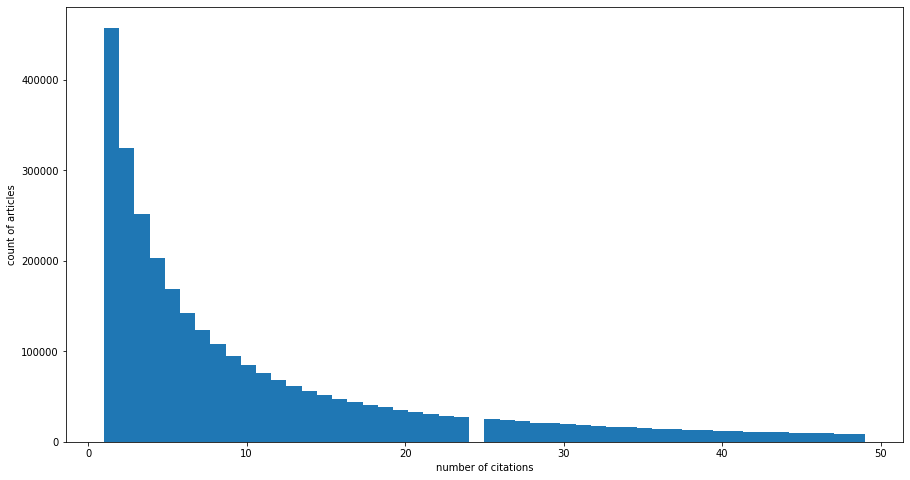

In [ ]:
data = df_citation[(df_citation['n_citation']>0)&(df_citation['n_citation']<50)].n_citation

from matplotlib import pyplot as plt 
fig = plt.figure(figsize=(15, 8))
plt.hist(data, bins = 50, histtype='stepfilled', edgecolor='none')
plt.xlabel("number of citations")
plt.ylabel("count of articles")

## Статистика публикационной активности по годам

In [ ]:
df_years = pd.read_csv('/content/gdrive/MyDrive/17TeamProject/id_year.csv')
df_years.drop('Unnamed: 0', axis=1, inplace=True)
df_years.rename(columns = {'_id':'id'}, inplace=True)

Посчитаем количество пропущенных и нулевых значений в поле года публикации статьи:

In [ ]:
nans = df_years.year.isna().sum()
zeros = sum(df_years.year==0)
print(f'NaN values are {nans}', f'. Zero values are {zeros}')

NaN values are 13 . Zero values are 540


Можно сделать вывод, что поле года публикации статьи присутствует практически во всем датасете. Количество пропусков или нулевых значений очень мало

Посмотрим, статьи каких годов присутствуют в датасете по большей части:

In [ ]:
df_years.year.describe()

count    5.300678e+06
mean     2.009693e+03
std      2.298552e+01
min      0.000000e+00
25%      2.006000e+03
50%      2.012000e+03
75%      2.017000e+03
max      9.737000e+03
Name: year, dtype: float64

Видим, что среднее значение поля года публикации - 2009. Также можно увидеть, что статьи, с годом публикации менее 1996 составляют уже менее 1% от датасета. Для подсчета статистик будем использовать данные за года > 1990

In [ ]:
# Видим, что большую часть статей в датасете составляют статьи с 1990 годов. Для подсчета статистик будем исп
df_years.year.value_counts(normalize=True).nlargest(30)

2018.0    0.067105
2019.0    0.065835
2020.0    0.063571
2017.0    0.058392
2015.0    0.056741
2014.0    0.053911
2016.0    0.053191
2013.0    0.051492
2012.0    0.048014
2011.0    0.045138
2010.0    0.041775
2009.0    0.040249
2008.0    0.036716
2007.0    0.033939
2006.0    0.032123
2005.0    0.028078
2004.0    0.024191
2003.0    0.020178
2002.0    0.017353
2001.0    0.015478
2000.0    0.014450
1999.0    0.013037
1998.0    0.011617
1997.0    0.010320
2021.0    0.010063
1996.0    0.009345
1995.0    0.008635
1994.0    0.008124
1993.0    0.007264
1992.0    0.006251
Name: year, dtype: float64

Построим график распределения количества статей, публикуемых в год:

Text(0, 0.5, 'number of articles')

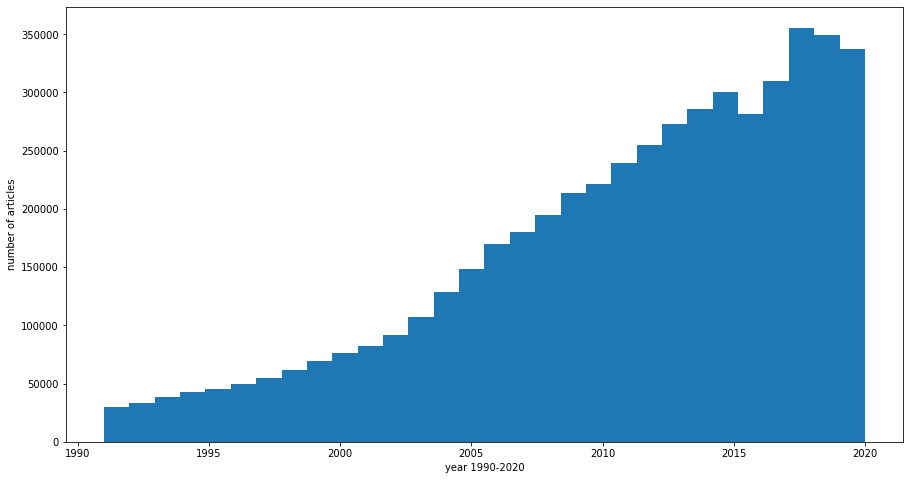

In [ ]:
data = df_years[(df_years.year>1990)&(df_years.year<=2020)].year

from matplotlib import pyplot as plt 
fig = plt.figure(figsize=(15, 8))
plt.hist(data, bins = 30, histtype='stepfilled', edgecolor='none')
plt.xlabel("year 1990-2020")
plt.ylabel("number of articles")

Но в поле года публикации также встречаются и выбросы, хоть их и малое количество:

In [ ]:
df_years[(df_years.year<=1900)|(df_years.year>=2023)].year.value_counts().nlargest(10)

0.0       540
13.0       17
2300.0     12
1898.0      5
1894.0      5
1899.0      3
1860.0      3
1892.0      2
1900.0      2
1895.0      2
Name: year, dtype: int64

# Статистика по годам

Посмотроим график суммарной цитируемости статей по годам публикаций:

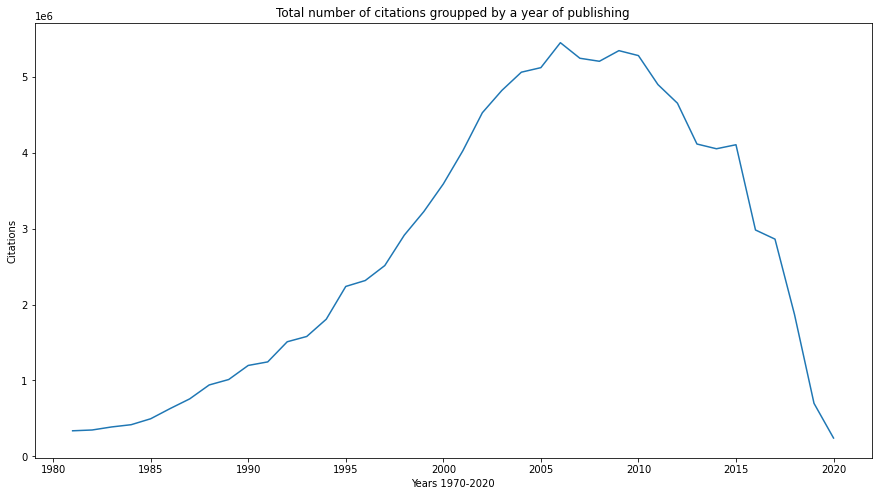

In [ ]:
df_year_cit = df_years.merge(df_citation, on='id')
fig = plt.figure(figsize=(15, 8))
plt.plot(df_year_cit[(df_year_cit.year>1980)&(df_year_cit.year<=2020)][['year', 'n_citation']].groupby(by='year').sum())
plt.xlabel("Years 1970-2020")
plt.ylabel("Citations")
plt.title('Total number of citations groupped by a year of publishing');

# Статистика по языкам статей

Проанализируем основные языки публикаций

In [ ]:
lang_df = pd.read_csv('/content/gdrive/MyDrive/MADE/data/lang_df.csv', header = 0, index_col = 0)

**количество отсутствующих значений**

In [ ]:
lang_df.shape[0] -lang_df.dropna().shape[0]

625769

**Распределение по языкам**
('zh' = "Chinese")

In [ ]:
lang_df['lang'].value_counts()

en    4674533
zh        389
Name: lang, dtype: int64

# Статистика по научным отраслям

In [ ]:
fos_df = pd.read_csv('/content/gdrive/MyDrive/MADE/data/fos_stat.csv', header = 0, index_col = 0)

fos_df.head()

,fos,count
0,Intelligent character recognition,2256
1,Pattern recognition,256848
2,Computer science,3127040
3,Feature (computer vision),12366
4,Document processing,1344


In [ ]:
fos_df.shape

(165978, 2)

Видим, что есть отрасли, по которым число публикаций превышает 58% от всего датасета

In [ ]:
fos_df.describe()

,count
count,1.659780e+05
mean,2.720206e+02
std,8.826910e+03
min,1.000000e+00
25%,2.000000e+00
50%,9.000000e+00
75%,4.400000e+01
max,3.127040e+06


**Самы популярные отрасли** (без Computer science)

In [ ]:
fos_df.sort_values('count',ascending=False, inplace = True)
new_fos_10_5= fos_df.drop(fos_df[fos_df.fos == 'Computer science'].index)
new_fos_10_5 = new_fos_10_5[new_fos_10_5['count'] > 100000]
print(new_fos_10_5.shape)
new_fos_10_5.head(20)


(32, 2)


,fos,count
9,Artificial intelligence,946703
120,Mathematics,830513
28,Algorithm,383091
60,Engineering,321080
373,Computer vision,304508
95,Computer network,297062
1,Pattern recognition,256848
180,Control theory,256069
172,Mathematical optimization,227218
52,Distributed computing,217544


<BarContainer object of 32 artists>

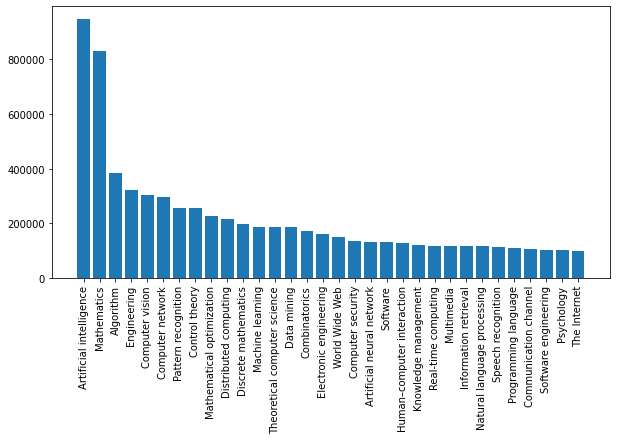

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(new_fos_10_5['fos'], new_fos_10_5['count'] )
 
#new_fos.plot.bar(x='fos', y='count', rot = 0)

##Отрасли с количеством публикаций меньше 100

In [ ]:
new_fos_10_3= fos_df.drop(fos_df[fos_df.fos == 'Computer science'].index)
new_fos_10_3 = new_fos_10_3[new_fos_10_3['count'] < 100]
print(new_fos_10_3.shape)
new_fos_10_3.head(10)


(139653, 2)


,fos,count
34476,Category structure,99
43094,Age structure,99
40113,Disease Ontology,99
103968,Flipped learning,99
14682,Air combat,99
70283,Geophone,99
18424,Motherboard,99
34735,Trace driven simulation,99
37826,Micro doppler,99
44481,Signal source,99


## Статистика по Computer Science в разрезе лет

In [ ]:
cs_df = pandas.read_csv('/content/gdrive/MyDrive/MADE/data/cs_year_stat.csv', header = 0, index_col = 0)
cs_df.head()

,year,count
0,2000,44019
1,2001,46539
2,2002,52902
3,2003,62207
4,2004,77699


<BarContainer object of 22 artists>

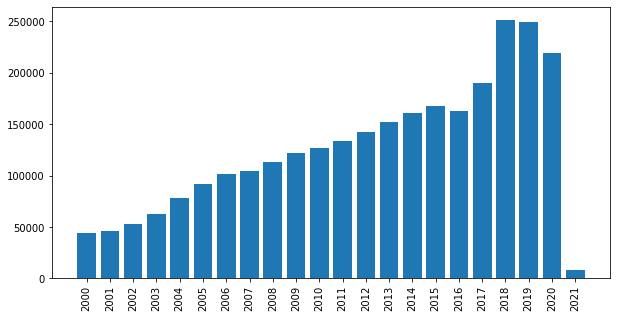

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(cs_df['year'], cs_df['count'] )

#Выводы

## На основе проведенного анализа данных были сделаны следующие выводы:

1. Из всех полей данных для дальнейшей работы по проекту мы будем брать следующие поля: _id', 'year', 'title', 'venue','authors', 'doi', 'fos', 'n_citation', 'lang', 'abstract', 'keywords', 'references'. 


*   для решения задачи кластеризации, классификации и моделирования тем можно использовать текстовые признаки статей, такие как 'title', 'fos', 'abstract', 'keywords'. Максимальное количество пропущенных значений наблюдается по полям 'abstract' - 11,9% и 'keywords'- 21.9%. Это говорит о том, что в худшем случае (если мы захотим использовать при обучении моделей поле 'keywords') у нас останется 78% данных, что составляет ~4,1 млн. записей. Однако мы также можем использовать  'keywords' как необязательный признак, и в этом случае у нас будет ~ 4.7 млн записей. На наш взгляд этого количества будет вполне достаточно для обучения вышеперечисленных моделей.

* остальные поля не имеют ценности для создания рекоммендаций, так как не связаны с содержанием статей и их взаимосвязями.

2. Оценка датасета по числу дубликатов показала, что в данных присутствует небольшое число дубликатов - 1%

3. Поле 'pdf' на 79 % состоит из отсутствующих значений, что позволяет смело удалить это поле, 'references' — 24 %, 'keywords' — 22 %.  Поля 'year', 'title', 'venue', 'authors' содержат менее 1% отсутствующих значений.

4. Оценка числа цитирований по статьям показывает, что более 35% всего датасета статей имеет либо 0 цитировай, либо это число пропущено (у более 25% - число цитирований = 0, у более 10% датасета - число цитирований пропущено. У статей, где число цитирования присутствует, медианное значение цитируемости - 3. У графика распределения числа цитирований очень длинный хвост в сторону больших значений n_citation.
5. Данные цитирований по годам показывают, что суммарное годовое число цитирований более ранних статей больше, чем суммарное годовое число цитирований новых статей (за последние 10 лет). Можно предположить, что это связано с некоторой "замедленной" реакцией научного сообщества на новые статьи, а также длительный отрезок времени подготовки новой публикации. Также данные опубликованных статей, сгруппированные по годам, показывают, что число статей, ежегодно попадающих в печать растет каждый год за редкими исключениями.
6. Основная часть статей в датасете представлена на английском языке, незначительное количество - на китайском, для ~12% (625 769) статей информация о языке отсутствует

7. Анализ научных направлений публикаций показал, что наиболее популярными областями являются широкие направления исследований (Computer science, Mathematics, Engineering, etc. Причем 59% статей опубликованы по направлению Computer science. Статистика по годам показывает также стабильный рост публикаций по этому направлению (2020, 2021 количество немного уменьшилось скорее всего из-за того, что еще не все статьи этих лет попали в датасет). Число всех направлений > 160 тыс., более 130 тыс. встречается менее 100 раз. Из этого можно сделать вывод, что направления исследований могут быть очень специфичны и в то же время относятся к какой-то большой обобщающей отрасли.    